In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing necessary Liberaries


In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import f_classif
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor

# Importing Data

In [76]:
dataset = pd.read_csv('/content/drive/MyDrive/codesoft/t2/IMDb Movies India.csv',encoding='latin1')
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Data Preprocessing

In [77]:
dataset.describe(include="all")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [78]:
dataset.shape

(15509, 10)

In [79]:
dataset.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

### Removing raws with missing values


In [80]:
dataset.dropna(subset= dataset.columns[1:],inplace=True)
dataset.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [81]:
dataset.shape

(5659, 10)


*   Converting the "Year", 'Duaration', and ' Votes' parameters to integer values.
*   Converting the 'Director', 'Actor1', 'Actor2', and 'Actor3' parameters to numerical values.
*   Spliting the 'Genre' column int 3 diff columns as there are movies that has several genres.


In [82]:
dataset['Year'] = dataset['Year'].str.strip('()').astype(int)
dataset['Duration'] = dataset['Duration'].str.replace('min', '').astype(int)
dataset['Votes'] = dataset['Votes'].str.replace(',', '').astype(int)
dataset["Directors"] = dataset['Director'].astype('category').cat.codes
dataset['Genre1'] = dataset['Genre'].str.split(',',expand=True).iloc[:,0]
dataset['Genre2'] = dataset['Genre'].str.split(',',expand=True).iloc[:,1]
dataset['Genre3'] = dataset['Genre'].str.split(',',expand=True).iloc[:,2]
dataset["Actor_1"] = dataset['Actor 1'].astype('category').cat.codes
dataset["Actor_2"] = dataset['Actor 2'].astype('category').cat.codes
dataset["Actor_3"] = dataset['Actor 3'].astype('category').cat.codes
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Directors,Genre1,Genre2,Genre3,Actor_1,Actor_2,Actor_3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,629,Drama,None,None,1352,2272,319
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,1335,Comedy,Romance,None,1198,719,2148
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1530,Comedy,Drama,Musical,378,75,2045
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,2044,Drama,Romance,War,692,1112,2524
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,135,Horror,Mystery,Thriller,1934,1175,1013


### ploting the correlation mat of the numerical values

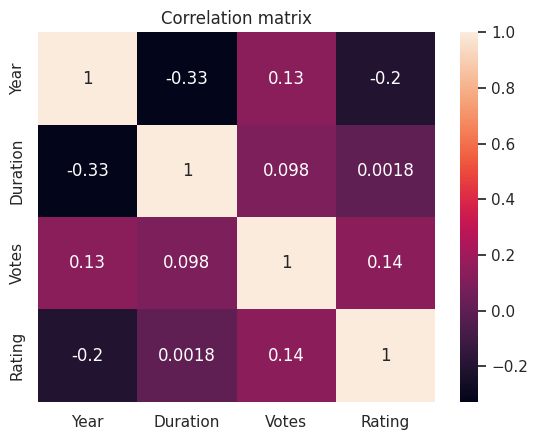

In [83]:
hm = sns.heatmap(dataset[['Year','Duration','Votes','Rating']].corr(), annot = True)
hm.set(title = "Correlation matrix")
plt.show()

<ipython-input-84-b65b6f54a822>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm = sns.heatmap(dataset.corr(), annot = True)


[Text(0.5, 1.0, 'Correlation matrix')]

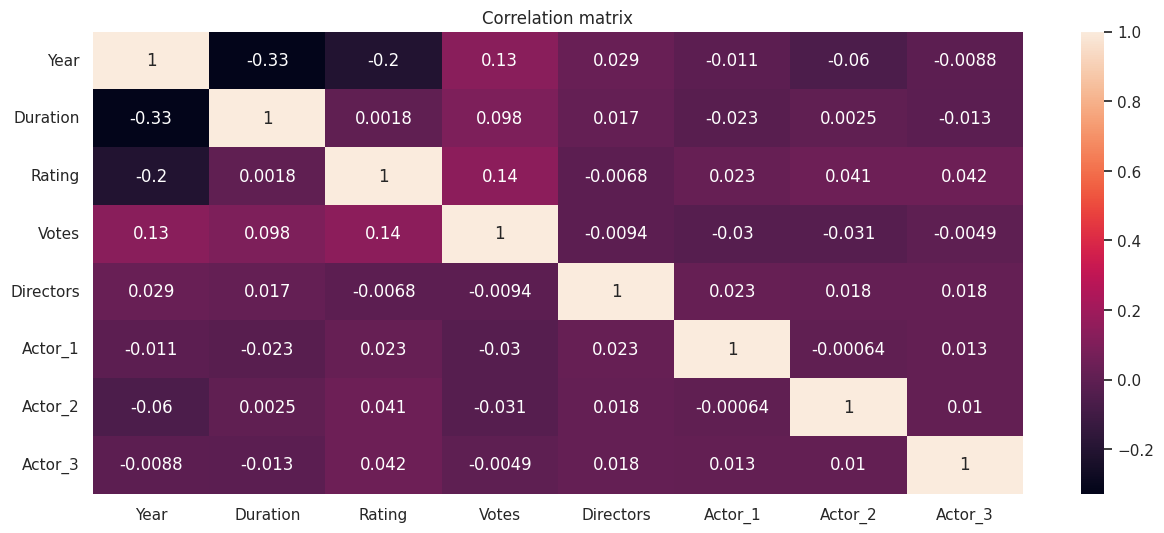

In [84]:
plt.figure(figsize=(15, 6))
hm = sns.heatmap(dataset.corr(), annot = True)
hm.set(title = "Correlation matrix")
# plt.show()

<ipython-input-85-646c7296e949>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset['Year'],color='k')
<ipython-input-85-646c7296e949>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


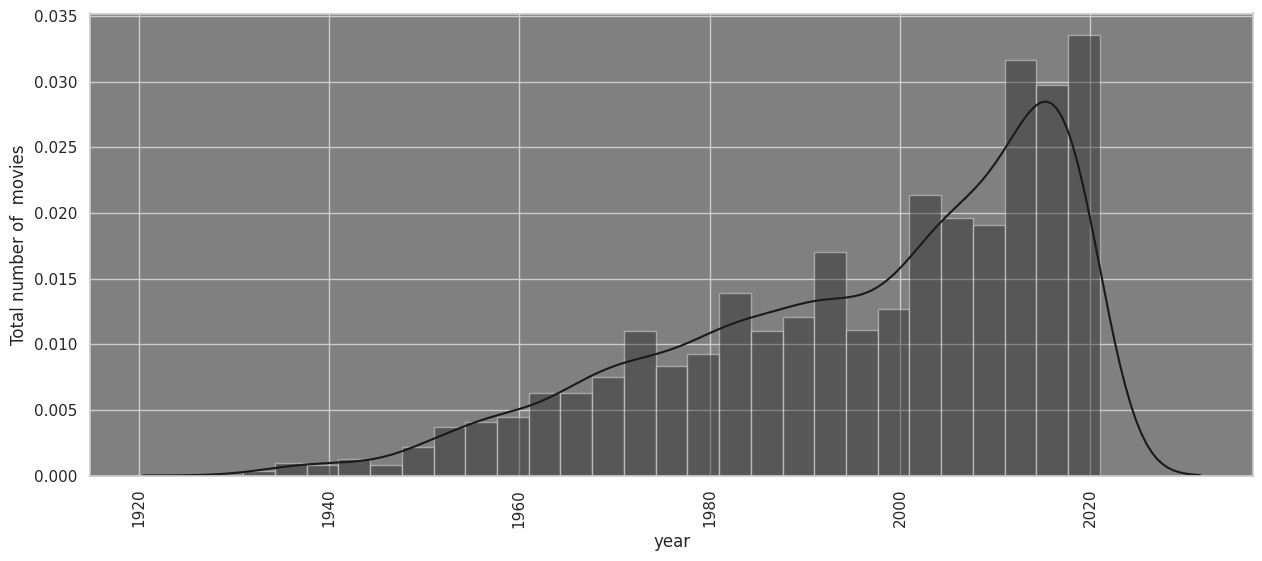

In [85]:
plt.figure(figsize=(15, 6))
ax=sns.distplot(dataset['Year'],color='k')
ax.set_facecolor('gray')
ax.set_xlabel('year')
ax.set_ylabel('Total number of  movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

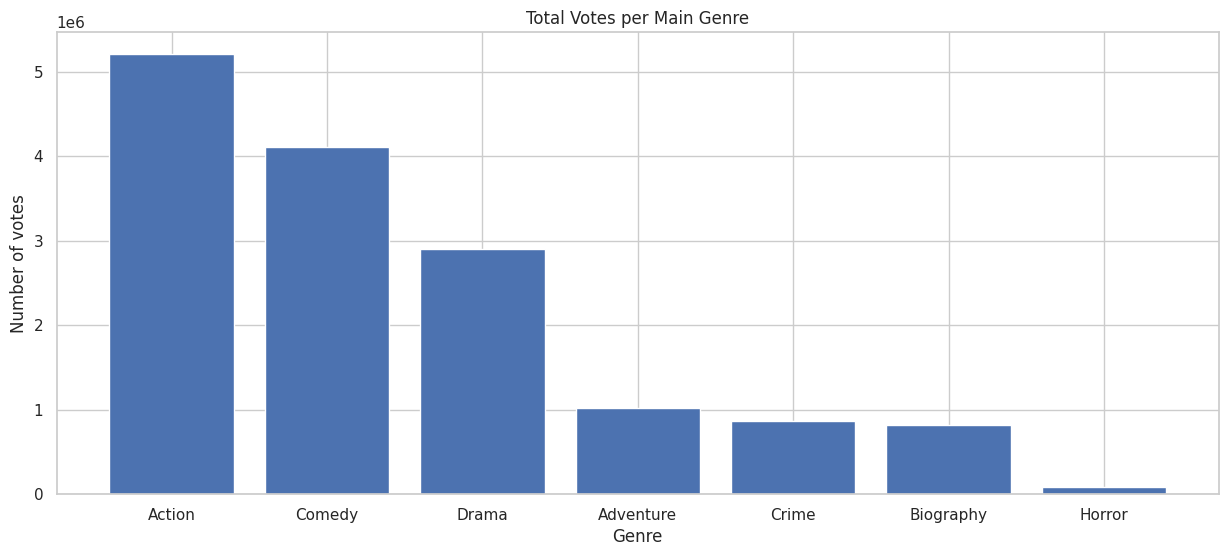

In [86]:
df_votes_genre = dataset.groupby(['Genre1'])['Votes'].sum().reset_index()
df_votes_genre.sort_values(['Votes'], ascending=False, axis=0, inplace=True)
#Create figure and axes
    #label
df_votes_genre_top_7 = df_votes_genre.head(7)
label=list(df_votes_genre_top_7.Genre1)

fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(label, df_votes_genre_top_7['Votes'],label=label)
ax.set_title('Total Votes per Main Genre')
ax.set_ylabel('Number of votes')
ax.set_xlabel('Genre')

plt.show()


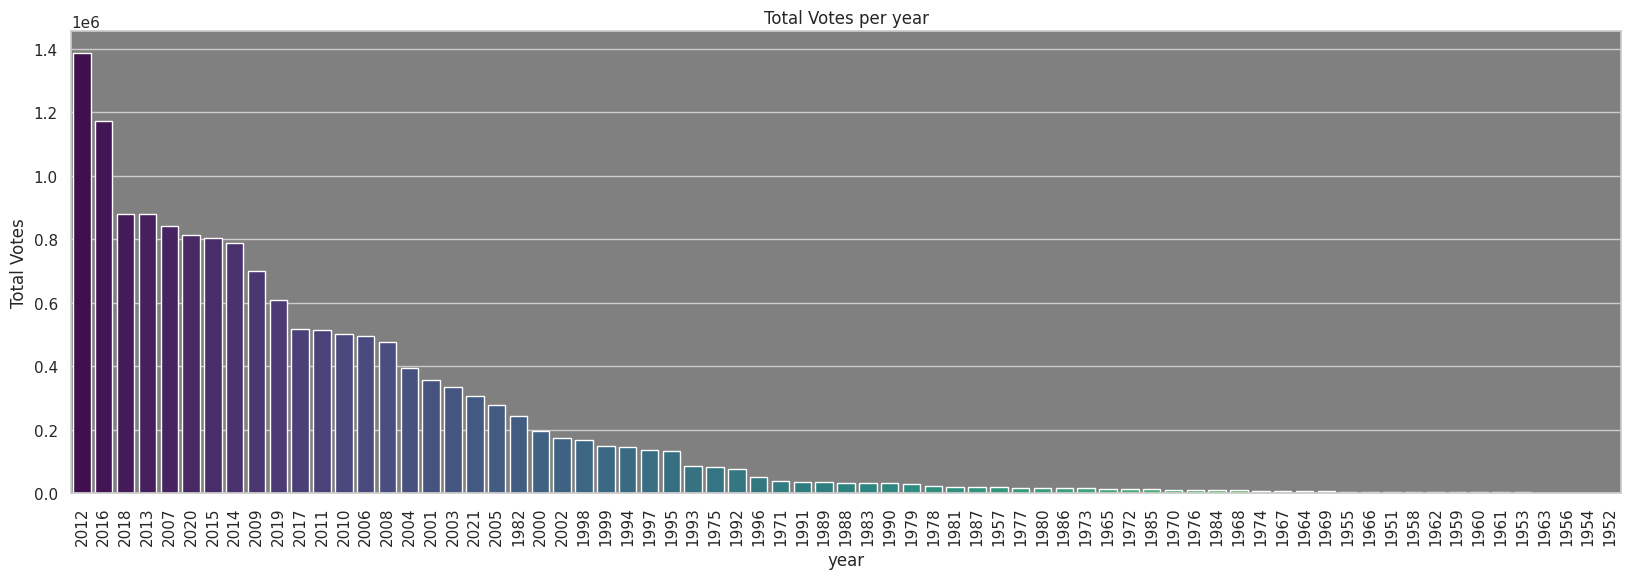

In [87]:
votes_per_year = dataset.groupby('Year')['Votes'].sum().reset_index()
votes_per_year=votes_per_year[votes_per_year['Year']>1950]
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=votes_per_year, x='Year', y='Votes',palette='viridis', order=votes_per_year.sort_values('Votes',ascending=False).Year)
ax.set_facecolor('gray')
ax.set_xlabel('year')
ax.set_ylabel('Total Votes')
ax.set_title('Total Votes per year')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       5659 non-null   object 
 1   Year       5659 non-null   int64  
 2   Duration   5659 non-null   int64  
 3   Genre      5659 non-null   object 
 4   Rating     5659 non-null   float64
 5   Votes      5659 non-null   int64  
 6   Director   5659 non-null   object 
 7   Actor 1    5659 non-null   object 
 8   Actor 2    5659 non-null   object 
 9   Actor 3    5659 non-null   object 
 10  Directors  5659 non-null   int16  
 11  Genre1     5659 non-null   object 
 12  Genre2     4001 non-null   object 
 13  Genre3     2319 non-null   object 
 14  Actor_1    5659 non-null   int16  
 15  Actor_2    5659 non-null   int16  
 16  Actor_3    5659 non-null   int16  
dtypes: float64(1), int16(4), int64(3), object(9)
memory usage: 663.2+ KB


In [89]:
dataset.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Directors', 'Genre1', 'Genre2',
       'Genre3', 'Actor_1', 'Actor_2', 'Actor_3'],
      dtype='object')

In [90]:
num_data = dataset[['Year', 'Duration', 'Genre', 'Rating', 'Votes','Genre1', 'Genre2', 'Genre3', 'Directors', 'Actor_1', 'Actor_2', 'Actor_3']]
num_data.describe()

,Year,Duration,Rating,Votes,Directors,Actor_1,Actor_2,Actor_3
count,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585,1211.864994,966.963598,1182.761442,1276.103375
std,19.741839,25.319939,1.381165,13651.503584,686.698545,564.890824,666.834013,720.046925
min,1931.000000,21.000000,1.100000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,1983.000000,119.000000,5.000000,30.000000,637.000000,468.000000,617.000000,652.500000
50%,2002.000000,135.000000,6.100000,131.000000,1198.000000,971.000000,1198.000000,1306.000000
75%,2013.000000,150.000000,6.900000,922.500000,1793.000000,1472.000000,1767.500000,1868.500000
max,2021.000000,321.000000,10.000000,591417.000000,2430.000000,1959.000000,2320.000000,2555.000000


In [91]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       5659 non-null   int64  
 1   Duration   5659 non-null   int64  
 2   Genre      5659 non-null   object 
 3   Rating     5659 non-null   float64
 4   Votes      5659 non-null   int64  
 5   Genre1     5659 non-null   object 
 6   Genre2     4001 non-null   object 
 7   Genre3     2319 non-null   object 
 8   Directors  5659 non-null   int16  
 9   Actor_1    5659 non-null   int16  
 10  Actor_2    5659 non-null   int16  
 11  Actor_3    5659 non-null   int16  
dtypes: float64(1), int16(4), int64(3), object(4)
memory usage: 442.1+ KB


In [92]:
num_data.corr()['Rating']

<ipython-input-92-728beb4221cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  num_data.corr()['Rating']


Year        -0.204642
Duration     0.001839
Rating       1.000000
Votes        0.142563
Directors   -0.006824
Actor_1      0.023430
Actor_2      0.041353
Actor_3      0.042413
Name: Rating, dtype: float64

## separating each genre into a specific column---




In [93]:
Genres_1 = pd.get_dummies(num_data["Genre1"])
Genres_2 = pd.get_dummies(num_data["Genre2"])
Genres_3 = pd.get_dummies(num_data["Genre3"])
Genres_3.drop([' News',' Western'], axis=1,inplace=True)
cols = ['Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller','War']
Genres_3.columns = Genres_2.columns = cols
for col in cols:
  Genres_1[[col]] = Genres_1[[col]] + Genres_2[[col]] + Genres_3[[col]]
  print("done",col)
Genres_1.head()

done Action
done Adventure
done Biography
done Comedy
done Crime
done Drama
done Family
done Fantasy
done History
done Horror
done Music
done Musical
done Mystery
done Romance
done Sci-Fi
done Sport
done Thriller
done War


,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [94]:
ge_sum = Genres_1.sum().to_frame()
ge_sum.columns=['counts']
ge_sum.index.name = 'genre'
gs= ge_sum.sort_values('counts',ascending=False)
gs.head()

,counts
genre,
Drama,3796
Action,1686
Romance,1380
Comedy,1344
Crime,875


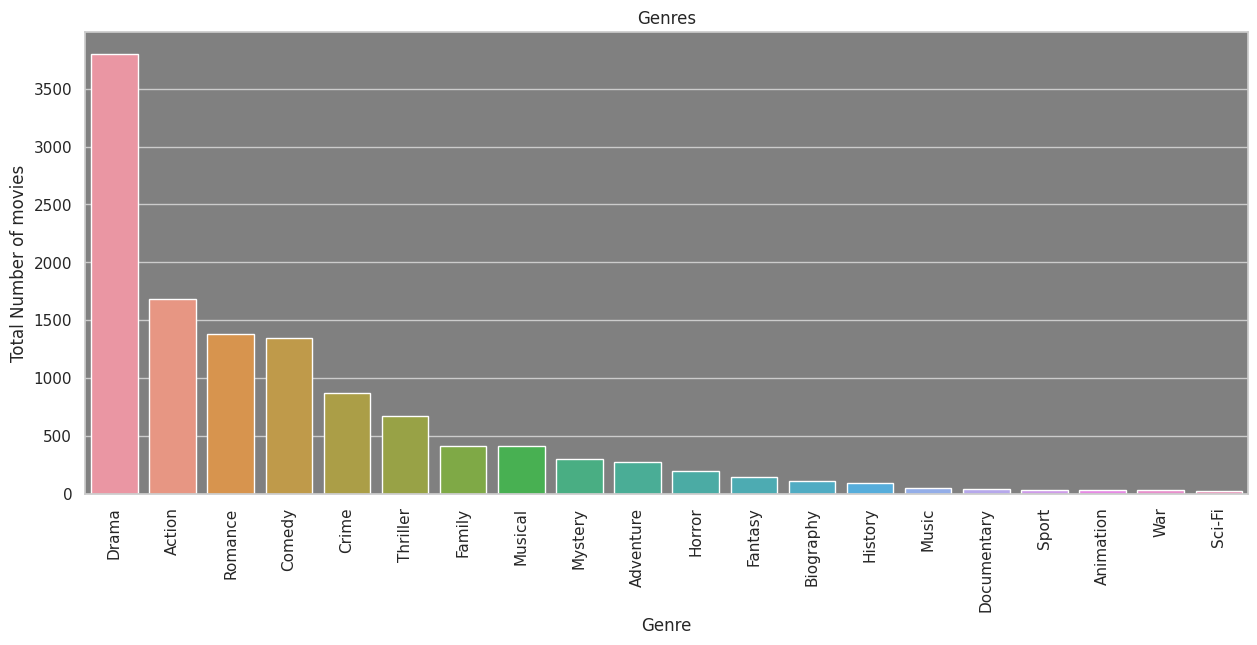

In [95]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=gs, x=gs.index, y='counts')
ax.set_facecolor('gray')
ax.set_xlabel('Genre')
ax.set_ylabel('Total Number of movies')
ax.set_title('Genres')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


In [96]:
Genres_1.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War'],
      dtype='object')

In [108]:
n_data = pd.concat([num_data, Genres_1], axis=1)
# drop non-num columns "Genre" from "data"
n_data.drop(["Genre",'Genre1','Genre2','Genre3','Directors'], axis = 1, inplace=True)
n_data.head()

,Year,Duration,Rating,Votes,Actor_1,Actor_2,Actor_3,Action,Adventure,Animation,...,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War
1,2019,109,7.0,8,1352,2272,319,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,110,4.4,35,1198,719,2148,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1997,147,4.7,827,378,75,2045,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,2005,142,7.4,1086,692,1112,2524,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,2012,82,5.6,326,1934,1175,1013,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [109]:
n_data.describe()

,Year,Duration,Rating,Votes,Actor_1,Actor_2,Actor_3,Action,Adventure,Animation,...,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War
count,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,...,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585,966.963598,1182.761442,1276.103375,0.297932,0.048949,0.007068,...,0.017494,0.035695,0.009366,0.072804,0.053720,0.243859,0.005655,0.007068,0.119986,0.005831
std,19.741839,25.319939,1.381165,13651.503584,564.890824,666.834013,720.046925,0.457390,0.215780,0.083783,...,0.131115,0.185546,0.096330,0.259838,0.225484,0.429447,0.074992,0.083783,0.324974,0.076147
min,1931.000000,21.000000,1.100000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1983.000000,119.000000,5.000000,30.000000,468.000000,617.000000,652.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2002.000000,135.000000,6.100000,131.000000,971.000000,1198.000000,1306.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2013.000000,150.000000,6.900000,922.500000,1472.000000,1767.500000,1868.500000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,321.000000,10.000000,591417.000000,1959.000000,2320.000000,2555.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
n_data.corr()['Rating']

Year          -0.204642
Duration       0.001839
Rating         1.000000
Votes          0.142563
Actor_1        0.023430
Actor_2        0.041353
Actor_3        0.042413
Action        -0.178334
Adventure     -0.003139
Animation      0.010628
Biography      0.087482
Comedy        -0.059603
Crime         -0.024284
Documentary    0.114509
Drama          0.163525
Family         0.086640
Fantasy       -0.010642
History        0.097251
Horror        -0.150626
Music          0.012192
Musical        0.070673
Mystery       -0.005309
Romance       -0.035959
Sci-Fi        -0.035242
Sport          0.037662
Thriller      -0.071786
War            0.004619
Name: Rating, dtype: float64

<Axes: xlabel='Year', ylabel='Rating'>

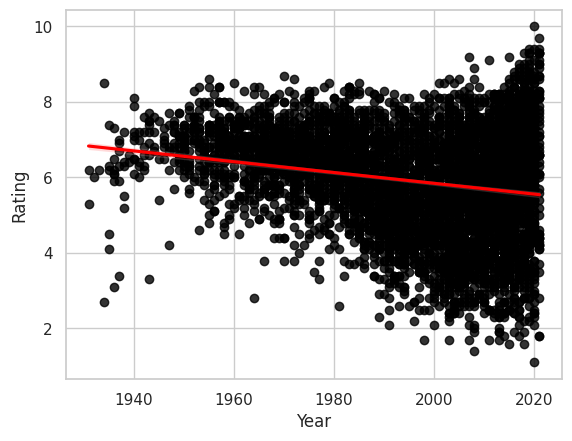

In [111]:
sns.regplot(x="Year",y='Rating',data=n_data,scatter_kws={"color": "black"}, line_kws={"color": "red"})

<Axes: ylabel='Year'>

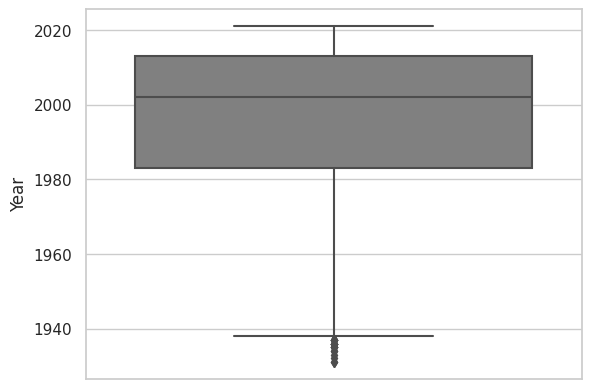

In [112]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=num_data, y="Year", color='gray')

# **Modeling**



In [113]:
y = n_data[['Rating']]
X= n_data.copy()
X.drop("Rating",axis=1,inplace=True)
X.head()

,Year,Duration,Votes,Actor_1,Actor_2,Actor_3,Action,Adventure,Animation,Biography,...,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War
1,2019,109,8,1352,2272,319,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,110,35,1198,719,2148,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1997,147,827,378,75,2045,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,2005,142,1086,692,1112,2524,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,2012,82,326,1934,1175,1013,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


## Spliting Data into Training and Test sets

In [114]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("training samples:",x_train.shape[0])
print('test samples =', x_test.shape[0])

training samples: 4527
test samples = 1132


### Training the Models

In [ ]:
lin = LinearRegression()
lin.fit(x_train, y_train)
lin_p = lin.predict(x_test)
lin_S = cross_val_score(lin, x_train, y_train, cv=5)

RF = RandomForestRegressor(n_estimators=100, random_state=1)
RF.fit(x_train, y_train)
rf_p = RF.predict(x_test)
RF_S = cross_val_score(RF, x_train, y_train, cv=5)

grad = GradientBoostingRegressor(n_estimators=100, random_state=60)
grad.fit(x_train, y_train)
grad_p = grad.predict(x_test)
grad_S = cross_val_score(grad, x_train, y_train, cv=5)

lgrad = LGBMRegressor(n_estimators=100, random_state=60)
lgrad.fit(x_train, y_train)
lgrad_p = lgrad.predict(x_test)
lgrad_S = cross_val_score(lgrad, x_train, y_train, cv=5)

# Model evaluation

In [116]:
print("Linear Regression cross validation mean",round(lin_S.mean()*100,3))
print("Random Forest Regression cross validation mean",round(RF_S.mean()*100,3))
print("Gradient Boosting Regression cross validation mean",round(grad_S.mean()*100,3))
print("Light Gradient Boosting Regression cross validation mean",round(lgrad_S.mean()*100,3))

Linear Regression cross validation mean 14.977
Random Forest Regression cross validation mean 34.742
Gradient Boosting Regression cross validation mean 36.289
Light Gradient Boosting Regression cross validation mean 37.589


In [117]:
print('Linear Regression\n Accuracy =  {0} %\n Mean Squared Error = {1}\n'.format(round(r2_score(y_test, lin_p)*100,3), round(mean_squared_error(y_test, lin_p),2)))
print('Random Forest Regression\n Accuracy =  {0} %\n Mean Squared Error = {1}\n'.format(round(r2_score(y_test, rf_p)*100,3),round(mean_squared_error(y_test, rf_p),2)))
print('Gradient Boosting Regression\n Accuracy =  {0} %\n Mean Squared Error = {1}\n'.format(round(r2_score(y_test, grad_p)*100,3), mean_squared_error(y_test, grad_p)))
print('Light Gradient Boosting Regression\n Accuracy =  {0} %\n Mean Squared Error = {1}\n'.format(round(r2_score(y_test, lgrad_p)*100,3), mean_squared_error(y_test, lgrad_p)))

Linear Regression
 Accuracy =  17.083 %
 Mean Squared Error = 1.53

Random Forest Regression
 Accuracy =  39.607 %
 Mean Squared Error = 1.12

Gradient Boosting Regression
 Accuracy =  39.291 %
 Mean Squared Error = 1.1228998676986117

Light Gradient Boosting Regression
 Accuracy =  41.533 %
 Mean Squared Error = 1.081422188099258



# Conclusion:
We can find that our dataset is not sufficient to predict the movie's rating.

### Thank you